In [5]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# MPC import
import numpy as np
from LinearMPC_deliverable_3_2.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from src.vel_rocket_vis import plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [9]:
# Ts = 0.05
# sim_time = 7
# H = 5.0
# x0 = ...  # initial state
# x_target = ...  # target state

# rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
# mpc = MPCVelControl().new_controller(rocket, Ts, H)

# t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
#     mpc, sim_time, H, x0, x_target=x_target, method="linear"
# )

# vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0
# vis.animate(
#     t_cl[:-1],
#     x_cl[:, :-1],
#     u_cl,
#     Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
#     T_ol=t_ol[..., :-1],
#     X_ol=x_ol,
#     U_ol=u_ol,
# )

In [10]:
Ts = 0.05
sim_time = 7.0
H = 10   # horizon (int)

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

# --- trim equilibrium ---
xs, us = rocket.trim()

# --- initial condition: start "at origin" / equilibrium, with 0 velocities ---
x0 = xs.copy()
x0[6] = 0.0   # vx
x0[7] = 0.0   # vy
x0[8] = 0.0   # vz
x0[5] = 0.0   # gamma (roll)

# --- reference (constant) ---
x_target = xs.copy()
x_target[6] = 3.0               # vx ref
x_target[7] = 3.0               # vy ref
x_target[8] = 3.0               # vz ref
x_target[5] = np.deg2rad(35.0)  # roll ref in rad

mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0,
    x_target=x_target,      
    u_target=us,            
    method="linear"
)

# --- Ref matrix for plotting (same length as u_cl over time) ---
Ref = x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1], x_cl[:, :-1], u_cl,
    Ref=Ref,
    T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol
)


['A', 'H', 'b']
['A', 'H', 'b']
Simulating time 0.00: 

c:\Users\SammD\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


u_x: [-0.18779955]
u_y: [0.26180143]
u_z: [80.00000001]
u_roll: [10.41951534]

Simulating time 0.05: u_x: [-0.0495552]
u_y: [0.26179995]
u_z: [79.99998695]
u_roll: [9.04868435]

Simulating time 0.10: u_x: [0.0145885]
u_y: [-0.24932683]
u_z: [79.99999215]
u_roll: [7.81176322]

Simulating time 0.15: u_x: [0.04249673]
u_y: [-0.26137375]
u_z: [79.99998957]
u_roll: [6.69747753]

Simulating time 0.20: u_x: [0.05222702]
u_y: [-0.02308475]
u_z: [79.99998531]
u_roll: [5.69517546]

Simulating time 0.25: u_x: [0.05198213]
u_y: [0.01636895]
u_z: [79.99999159]
u_roll: [4.79506295]

 State alpha violation: -0.17 < -0.17, 
Simulating time 0.30: u_x: [0.04431712]
u_y: [-0.00984802]
u_z: [79.99998719]
u_roll: [3.98818425]

Simulating time 0.35: u_x: [0.02752388]
u_y: [0.00580005]
u_z: [79.99999307]
u_roll: [3.26616836]

 State alpha violation: -0.17 < -0.17, 
Simulating time 0.40: u_x: [0.006464]
u_y: [-0.00340669]
u_z: [79.99998825]
u_roll: [2.62147488]

Simulating time 0.45: u_x: [-0.00229173]
u_y: [

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x202d3531b80>,
 'scene_objects': {'rocket_actor': Actor (0x202d2eb98a0)
    Center:                     (0.32006999999999997, -0.0015085000000000237, 0.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -6.402E-01, 1.280E+00
    Y Bounds                    -1.21

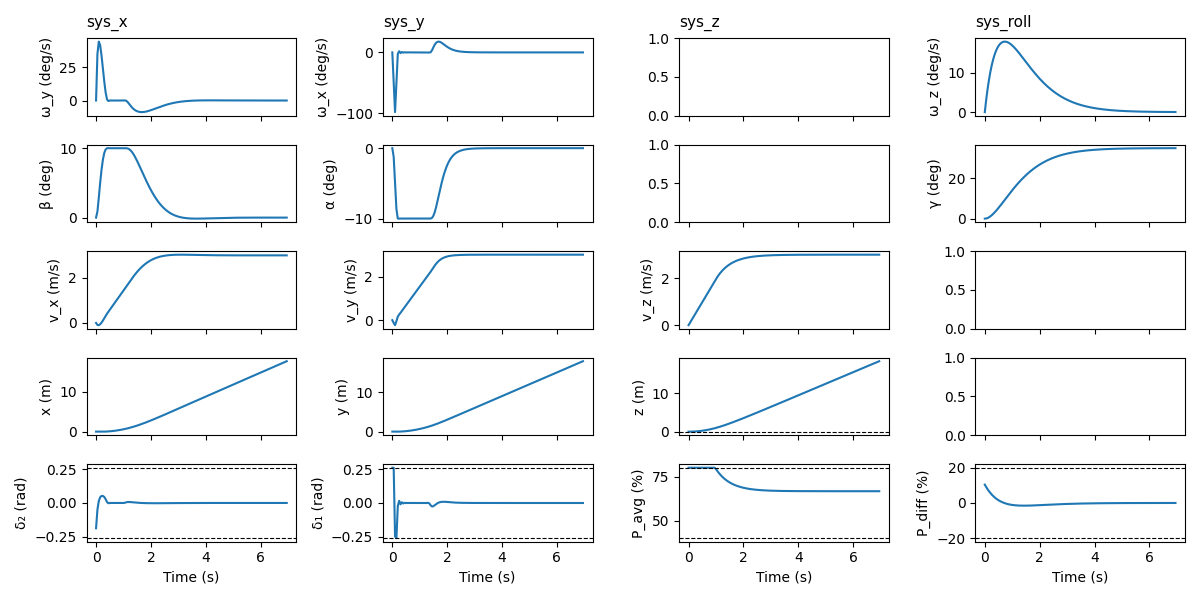

In [ ]:
plot_static_states_inputs(
    T=t_cl[:-1],      
    X=x_cl[:, :-1],   
    U=u_cl,           
    Ref=None,
    type="vel"
)



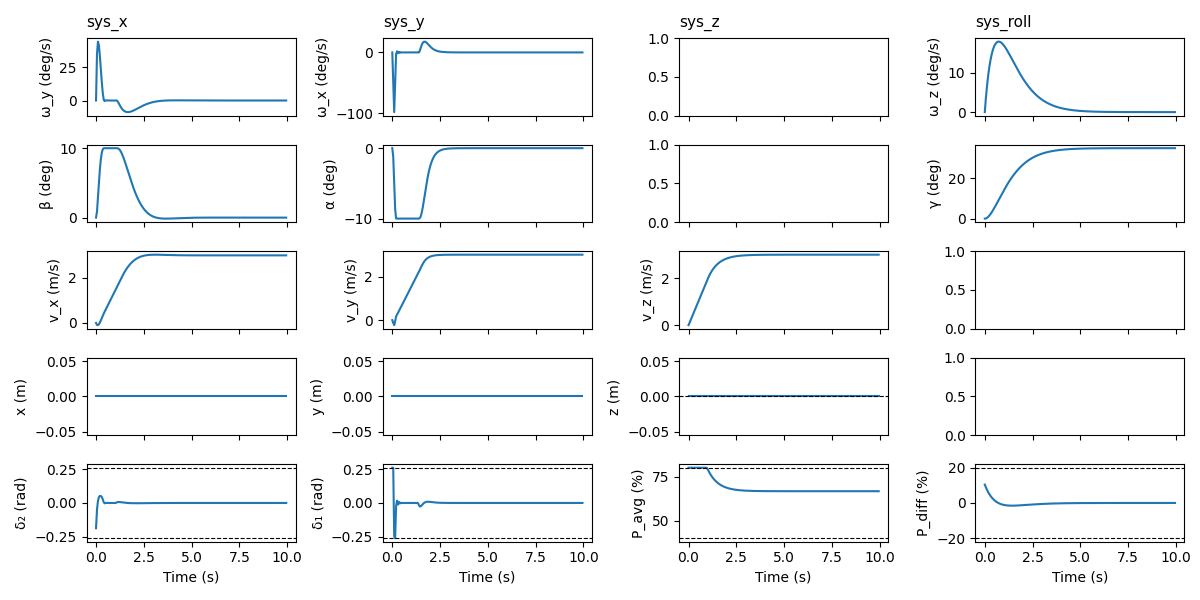

In [ ]:


k = 0
T_ol = t_ol[:, k]     
X_ol = x_ol[:, :, k]   
U_ol = u_ol[:, :, k]   

plot_static_states_inputs(
    T=T_ol[:-1],
    X=X_ol[:, :-1],
    U=U_ol,
    Ref=None,
    type="vel"
)
